In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

,Market,Date,Grade,Arrivals,Unit,Min,Max,Modal,Variety,District
0,MANGALURU,2019-04-01 00:00:00,AVERAGE,228,Quintal,12000,18000,16000,COCA,Dakshina Kannada
1,MANGALURU,2019-04-02 00:00:00,AVERAGE,227,Quintal,12000,18000,16000,COCA,Dakshina Kannada
2,MANGALURU,2019-04-03 00:00:00,AVERAGE,226,Quintal,12000,18000,16000,COCA,Dakshina Kannada
3,MANGALURU,2019-04-04 00:00:00,AVERAGE,228,Quintal,12000,18000,16000,COCA,Dakshina Kannada
4,MANGALURU,2019-04-05 00:00:00,AVERAGE,231,Quintal,12000,18000,16000,COCA,Dakshina Kannada


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense,Conv1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
excel_data = pd.read_excel('./Dataset/Coca/Coca(2015-2022).xlsx')
df = pd.DataFrame(excel_data)
df.head()

In [2]:
df.isna().sum()

Market      0
Date        0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
Variety     0
District    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    1867 non-null   object
 1   Date      1867 non-null   object
 2   Grade     1867 non-null   object
 3   Arrivals  1867 non-null   int64 
 4   Unit      1867 non-null   object
 5   Min       1867 non-null   int64 
 6   Max       1867 non-null   int64 
 7   Modal     1867 non-null   int64 
 8   Variety   1867 non-null   object
 9   District  1867 non-null   object
dtypes: int64(4), object(6)
memory usage: 146.0+ KB


In [4]:
df_test = df
df_test['Date']=pd.to_datetime(df['Date'])

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Market    1867 non-null   object        
 1   Date      1867 non-null   datetime64[ns]
 2   Grade     1867 non-null   object        
 3   Arrivals  1867 non-null   int64         
 4   Unit      1867 non-null   object        
 5   Min       1867 non-null   int64         
 6   Max       1867 non-null   int64         
 7   Modal     1867 non-null   int64         
 8   Variety   1867 non-null   object        
 9   District  1867 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 146.0+ KB


In [6]:
df_test.sort_values(by='Date',inplace=True)

In [7]:
df_test = df[['Date','Arrivals','Min','Max','Modal']]
df_test

,Date,Arrivals,Min,Max,Modal
801,2015-01-01,53,8900,16000,14000
802,2015-01-02,55,8900,16000,14000
803,2015-01-03,55,8900,16000,14000
804,2015-01-05,58,8900,16000,14000
805,2015-01-06,40,8900,16000,14000
...,...,...,...,...,...
1862,2022-11-04,263,25000,34000,30000
1863,2022-11-05,2900,20000,25000,24000
1864,2022-12-01,35,26000,31000,30800
1865,2022-12-04,962,22600,30400,27000


In [8]:
df_test.index = df_test['Date']
df_test

,Date,Arrivals,Min,Max,Modal
Date,,,,,
2015-01-01,2015-01-01,53,8900,16000,14000
2015-01-02,2015-01-02,55,8900,16000,14000
2015-01-03,2015-01-03,55,8900,16000,14000
2015-01-05,2015-01-05,58,8900,16000,14000
2015-01-06,2015-01-06,40,8900,16000,14000
...,...,...,...,...,...
2022-11-04,2022-11-04,263,25000,34000,30000
2022-11-05,2022-11-05,2900,20000,25000,24000
2022-12-01,2022-12-01,35,26000,31000,30800


In [9]:
df_test.drop('Date',axis=1,inplace=True)
df_test

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_15980\1244294919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('Date',axis=1,inplace=True)


,Arrivals,Min,Max,Modal
Date,,,,
2015-01-01,53,8900,16000,14000
2015-01-02,55,8900,16000,14000
2015-01-03,55,8900,16000,14000
2015-01-05,58,8900,16000,14000
2015-01-06,40,8900,16000,14000
...,...,...,...,...
2022-11-04,263,25000,34000,30000
2022-11-05,2900,20000,25000,24000
2022-12-01,35,26000,31000,30800


In [ ]:
df_test = df_test.drop('Arrivals',axis=1)

In [12]:
# df_test.to_excel('./Dataset/Coca/Coca_dataset.xlsx',index=True)

In [ ]:
# df_test = df_test.drop('Modal first difference', axis=1)

In [15]:
df_1 = pd.read_csv('./Dataset/Coca/coca_test.csv')
df_1.head()

,Date,Arrivals,Min,Max,Modal
0,2015-01-01,53,8900,16000,14000
1,2015-01-02,55,8900,16000,14000
2,2015-01-03,55,8900,16000,14000
3,2015-01-05,58,8900,16000,14000
4,2015-01-06,40,8900,16000,14000


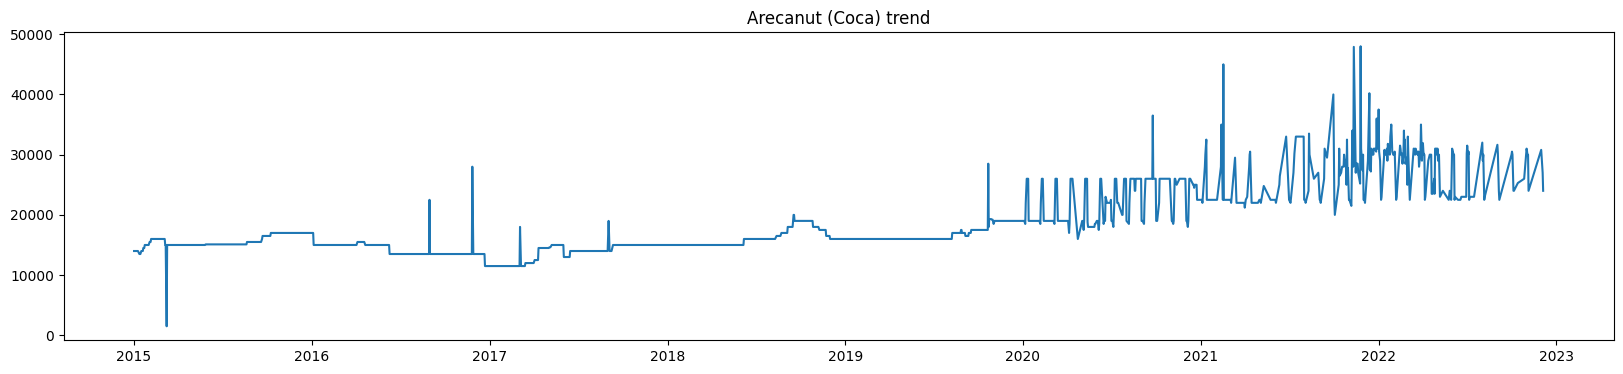

In [16]:
plt.figure(figsize=(20,4))
plt.plot(df_test['Modal'])
plt.title('Arecanut (Coca) trend')
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler 

scaler_coca = MinMaxScaler(feature_range=(0,1))

In [18]:
df_coca1 = df_test.drop('Arrivals',axis=1)

In [19]:
df_coca1

,Min,Max,Modal
Date,,,
2015-01-01,8900,16000,14000
2015-01-02,8900,16000,14000
2015-01-03,8900,16000,14000
2015-01-05,8900,16000,14000
2015-01-06,8900,16000,14000
...,...,...,...
2022-11-04,25000,34000,30000
2022-11-05,20000,25000,24000
2022-12-01,26000,31000,30800


In [ ]:
df_coca1 = df_coca1.drop('Modal first difference',axis=1)

In [21]:
df_coca1

,Min,Max,Modal
Date,,,
2015-01-01,8900,16000,14000
2015-01-02,8900,16000,14000
2015-01-03,8900,16000,14000
2015-01-05,8900,16000,14000
2015-01-06,8900,16000,14000
...,...,...,...
2022-11-04,25000,34000,30000
2022-11-05,20000,25000,24000
2022-12-01,26000,31000,30800


In [22]:
df_coca = df_coca1

In [23]:
df_coca

,Min,Max,Modal
Date,,,
2015-01-01,8900,16000,14000
2015-01-02,8900,16000,14000
2015-01-03,8900,16000,14000
2015-01-05,8900,16000,14000
2015-01-06,8900,16000,14000
...,...,...,...
2022-11-04,25000,34000,30000
2022-11-05,20000,25000,24000
2022-12-01,26000,31000,30800


In [24]:
# Define the columns you want to scale
columns_to_scale = ['Min', 'Max', 'Modal']

# Apply MinMaxScaler to the selected columns
df_coca[columns_to_scale] = scaler_coca.fit_transform(df_coca[columns_to_scale])

In [25]:
#df_coca.drop('Modal first difference',axis=1,inplace=True)

In [26]:
#df_coca.drop('Arrivals',axis=1,inplace=True)

In [27]:
df_coca.head(10)

,Min,Max,Modal
Date,,,
2015-01-01,0.194301,0.026455,0.268817
2015-01-02,0.194301,0.026455,0.268817
2015-01-03,0.194301,0.026455,0.268817
2015-01-05,0.194301,0.026455,0.268817
2015-01-06,0.194301,0.026455,0.268817
2015-01-07,0.191710,0.026455,0.268817
2015-01-08,0.191710,0.026455,0.268817
2015-01-09,0.191710,0.026455,0.268817
2015-01-12,0.194301,0.026455,0.258065


In [28]:
df_coca.tail()

,Min,Max,Modal
Date,,,
2022-11-04,0.611399,0.502646,0.612903
2022-11-05,0.481865,0.264550,0.483871
2022-12-01,0.637306,0.423280,0.630108
2022-12-04,0.549223,0.407407,0.548387
2022-12-05,0.481865,0.264550,0.483871


In [29]:
def df_to_X_y(df, window_size=1):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2] 
        y.append(label)
    return np.array(X), np.array(y)

In [30]:
WINDOW_SIZE = 3 
X_coca, y_coca= df_to_X_y(df_coca,WINDOW_SIZE)
X_coca.shape, y_coca.shape

((1864, 3, 3), (1864, 3))

In [31]:
train_size = int(len(df_test)*0.8)
val_size = int((len(df_test) - train_size)*0.7)
test_size = len(df_test) - (train_size + val_size)

print(train_size, val_size ,test_size)

1493 261 113


In [32]:
y_coca

array([[0.19430052, 0.02645503, 0.2688172 ],
       [0.19430052, 0.02645503, 0.2688172 ],
       [0.19170984, 0.02645503, 0.2688172 ],
       ...,
       [0.6373057 , 0.42328042, 0.63010753],
       [0.5492228 , 0.40740741, 0.5483871 ],
       [0.48186528, 0.26455026, 0.48387097]])

### 1105 - 2019[start]
### 1740 - 2022[start]

In [33]:
X_train, y_train = X_coca[:1500], y_coca[:1500]
X_val, y_val = X_coca[1500:1750], y_coca[1500:1750]
X_test, y_test = X_coca[1750:] ,y_coca[1750:] 


X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1500, 3, 3), (1500, 3), (250, 3, 3), (250, 3), (114, 3, 3), (114, 3))

In [36]:
model_coca=Sequential()
model_coca.add(InputLayer((3,3))),
model_coca.add(LSTM(64)),
model_coca.add(Dense(64, 'relu')),
model_coca.add(Dense(30, 'relu')),
model_coca.add(Dense(3)),



model_coca.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 30)                1950      
                                                                 
 dense_2 (Dense)             (None, 3)                 93        
                                                                 
Total params: 23611 (92.23 KB)
Trainable params: 23611 (92.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model_coca.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

In [38]:
hist_coca = model_coca.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=2)

Epoch 1/100
47/47 - 4s - loss: 0.0556 - mean_absolute_error: 0.2135 - val_loss: 0.2075 - val_mean_absolute_error: 0.4300 - 4s/epoch - 93ms/step
Epoch 2/100
47/47 - 0s - loss: 0.0419 - mean_absolute_error: 0.1807 - val_loss: 0.1689 - val_mean_absolute_error: 0.3803 - 444ms/epoch - 9ms/step
Epoch 3/100
47/47 - 0s - loss: 0.0283 - mean_absolute_error: 0.1423 - val_loss: 0.1277 - val_mean_absolute_error: 0.3192 - 371ms/epoch - 8ms/step
Epoch 4/100
47/47 - 0s - loss: 0.0162 - mean_absolute_error: 0.1025 - val_loss: 0.0890 - val_mean_absolute_error: 0.2559 - 487ms/epoch - 10ms/step
Epoch 5/100
47/47 - 0s - loss: 0.0078 - mean_absolute_error: 0.0713 - val_loss: 0.0608 - val_mean_absolute_error: 0.2006 - 375ms/epoch - 8ms/step
Epoch 6/100
47/47 - 0s - loss: 0.0038 - mean_absolute_error: 0.0485 - val_loss: 0.0473 - val_mean_absolute_error: 0.1665 - 370ms/epoch - 8ms/step
Epoch 7/100
47/47 - 0s - loss: 0.0023 - mean_absolute_error: 0.0356 - val_loss: 0.0398 - val_mean_absolute_error: 0.1472 - 37

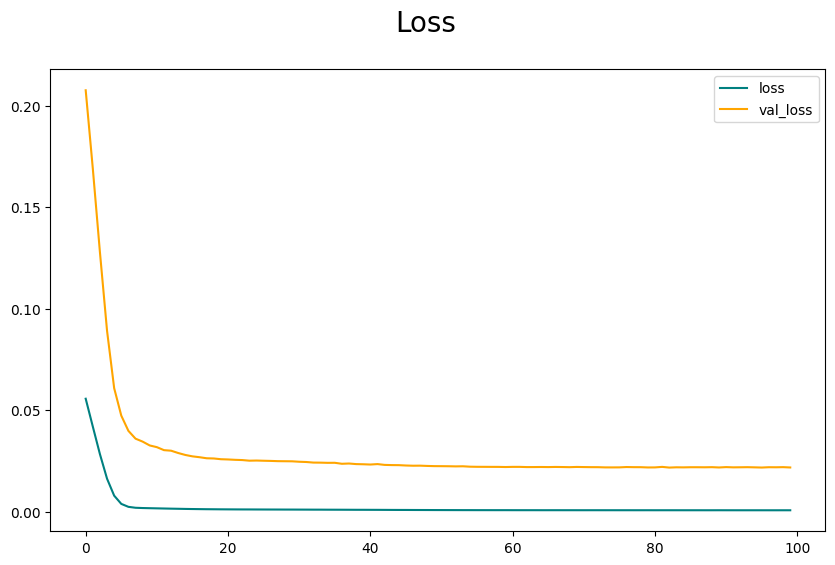

In [39]:
plt.figure(figsize=(10,6))
plt.plot(hist_coca.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist_coca.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [ ]:
# model_coca.save('./models/Coca/model_coca1.h5')

In [ ]:
# from tensorflow.keras.models import load_model
# model_coca = load_model('./models/Coca/model_coca1.h5')

In [40]:
X_train.shape

(1500, 3, 3)

In [41]:
train_predictions = model_coca.predict(X_train, verbose=0)

In [44]:
train_predictions

array([[0.19337553, 0.03169287, 0.26563692],
       [0.19337553, 0.03169287, 0.26563692],
       [0.19337553, 0.03169287, 0.26563692],
       ...,
       [0.49835885, 0.30716383, 0.52152836],
       [0.4491773 , 0.26237753, 0.47306976],
       [0.40162048, 0.2303036 , 0.41879156]], dtype=float32)

In [45]:
train_predictions.shape
#train_prediction

(1500, 3)

In [46]:
y_train.shape

(1500, 3)

In [44]:
y_train_pred = scaler_coca.inverse_transform(train_predictions)
y_train_pred.shape

(1500, 3)

In [45]:
y_train_pred

array([[ 8687.183, 16046.79 , 13930.025],
       [ 8687.183, 16046.79 , 13930.025],
       [ 8687.183, 16046.79 , 13930.025],
       ...,
       [22071.56 , 26928.049, 25261.566],
       [19055.717, 25260.326, 23360.133],
       [16506.35 , 23871.81 , 21197.438]], dtype=float32)

In [46]:
x = pd.DataFrame({'Train predictions(scaled)':train_predictions.flatten(),
                  'Train_prediction (inverse_transformed)':y_train_pred.flatten(),
                  'Actual':scaler_coca.inverse_transform(y_train).flatten()})

x.head(20)

,Train predictions(scaled),Train_prediction (inverse_transformed),Actual
0,0.188787,8687.182617,8900.0
1,0.027693,16046.790039,16000.0
2,0.267312,13930.025391,14000.0
3,0.188787,8687.182617,8900.0
4,0.027693,16046.790039,16000.0
5,0.267312,13930.025391,14000.0
6,0.188787,8687.182617,8800.0
7,0.027693,16046.790039,16000.0
8,0.267312,13930.025391,14000.0
9,0.188053,8658.864258,8800.0


In [53]:
X_train.shape, y_train.shape

((1500, 3, 3), (1500, 3))

In [ ]:
def plot_predictions(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({'prediction_Min': predictions[:, 0],
                                'Actual_Min': y[:, 0],
                              'prediction_Max': predictions[:, 1],
                                'Actual_Max': y[:, 1],
                              'prediction_Modal': predictions[:, 2],
                                'Actual_Modal': y[:, 2]})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Min'][start:end],color='orange',label='Predictions_Min')
    plt.plot(df['Actual_Min'][start:end],color='green',label='Actual_Min')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Max'][start:end],color='orange',label='Predictions_Max')
    plt.plot(df['Actual_Max'][start:end],color='green',label='Actual_Max')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show() 
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Modal'][start:end],color='orange',label='Predictions_Modal')
    plt.plot(df['Actual_Modal'][start:end],color='green',label='Actual_Modal')
    plt.title(tag)
    plt.legend(loc='upper left')

Mean absolute error for Train prediction is 0.009937732077777072
-------------------------------------------------------------------------------------
r2 for Train prediction is 83.13836355971907
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.188787    0.194301        0.027693    0.026455          0.267312   
1        0.188787    0.194301        0.027693    0.026455          0.267312   
2        0.188787    0.191710        0.027693    0.026455          0.267312   
3        0.188053    0.191710        0.027736    0.026455          0.267303   
4        0.187240    0.191710        0.027802    0.026455          0.267282   
5        0.186401    0.194301        0.027881    0.026455          0.267225   
6        0.187458    0.194301        0.027764    0.026455          0.264955   
7        0.189040    0.194301        0.027420    0.026455          0.262554   
8      

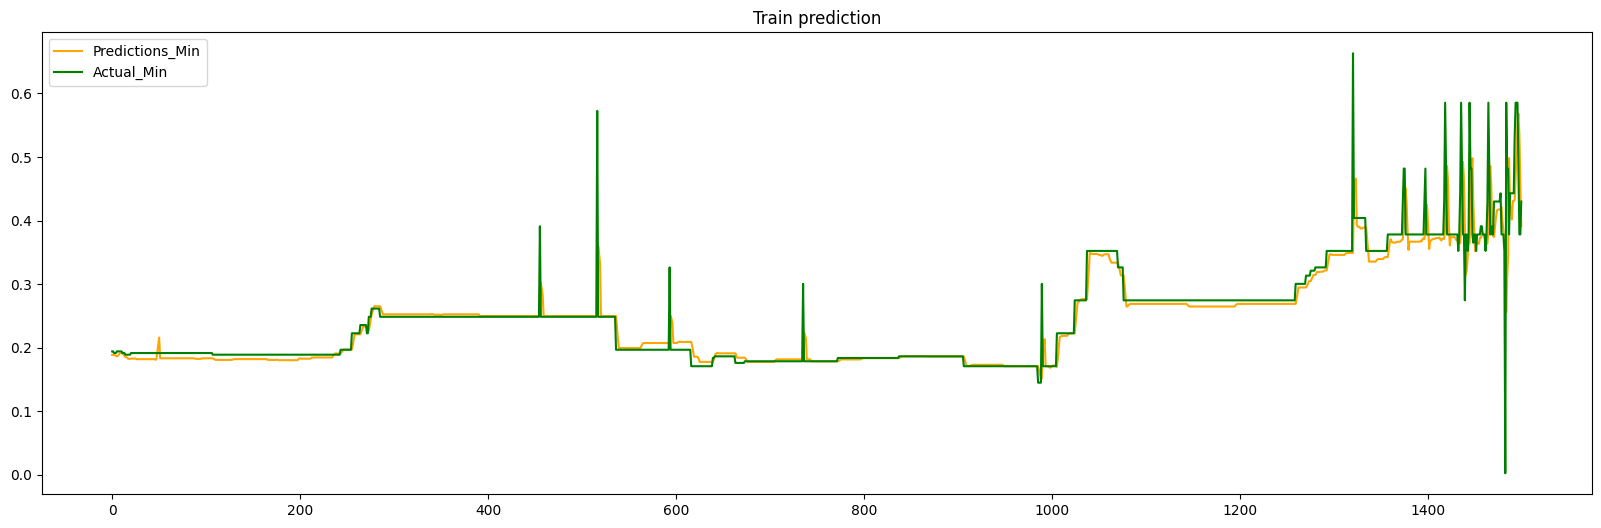

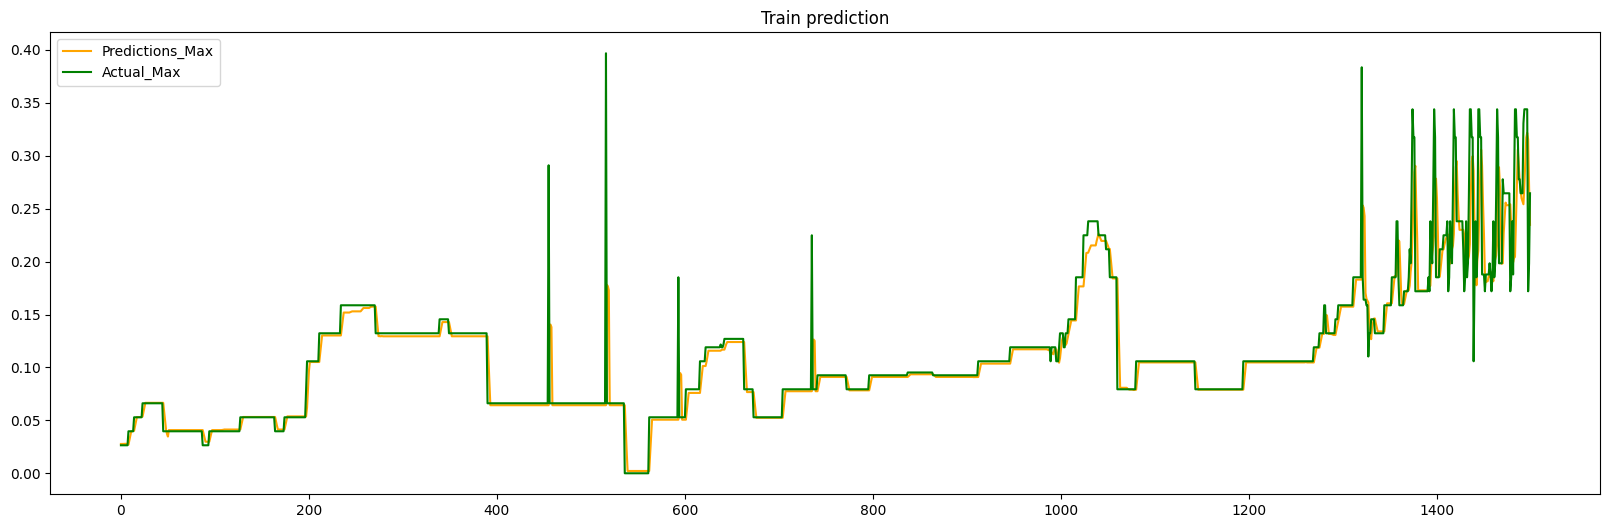

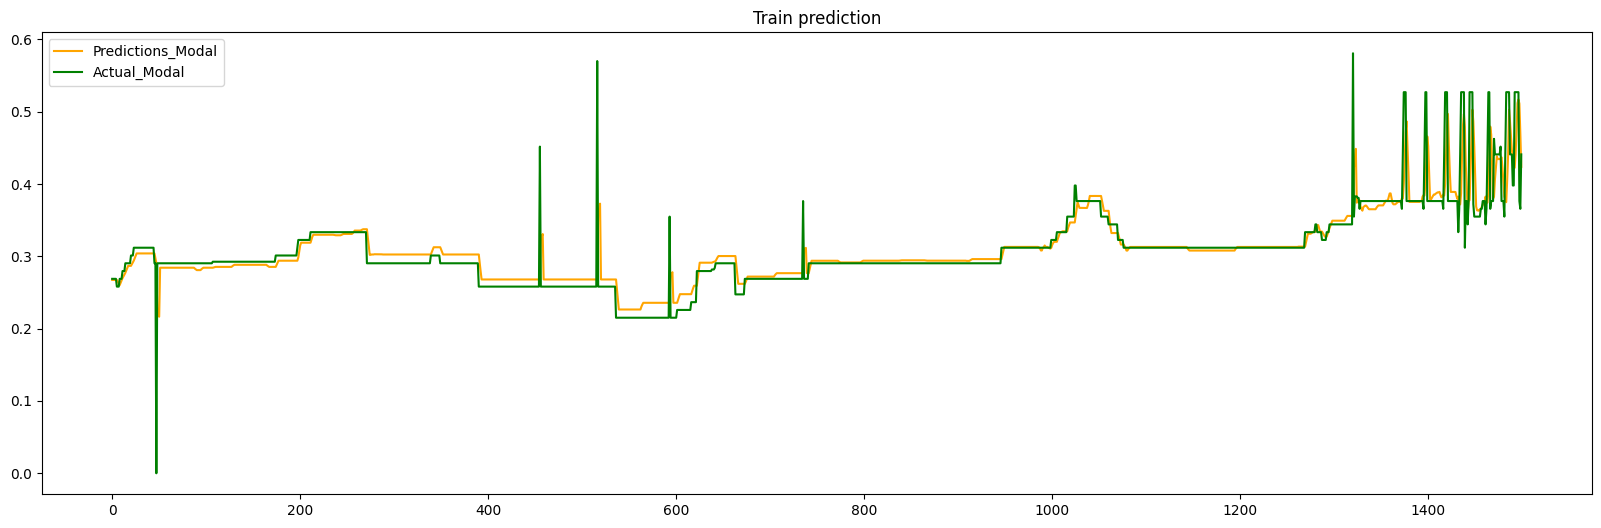

In [48]:
plot_predictions(model_coca, X_train, y_train, start=0, end=len(X_train), tag='Train prediction')

Mean absolute error for Val prediction is 0.0952414833331814
-------------------------------------------------------------------------------------
r2 for Val prediction is 6.789150622415015
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.389126    0.481865        0.213929    0.343915          0.397149   
1        0.426068    0.481865        0.257257    0.317460          0.433570   
2        0.451151    0.378238        0.284357    0.317460          0.471441   
3        0.428879    0.585492        0.290499    0.343915          0.486572   
4        0.459497    0.481865        0.298060    0.343915          0.490308   
5        0.462047    0.481865        0.302014    0.317460          0.490436   
6        0.498198    0.481865        0.305822    0.291005          0.502644   
7        0.459455    0.481865        0.291272    0.291005          0.484851   
8        0.46

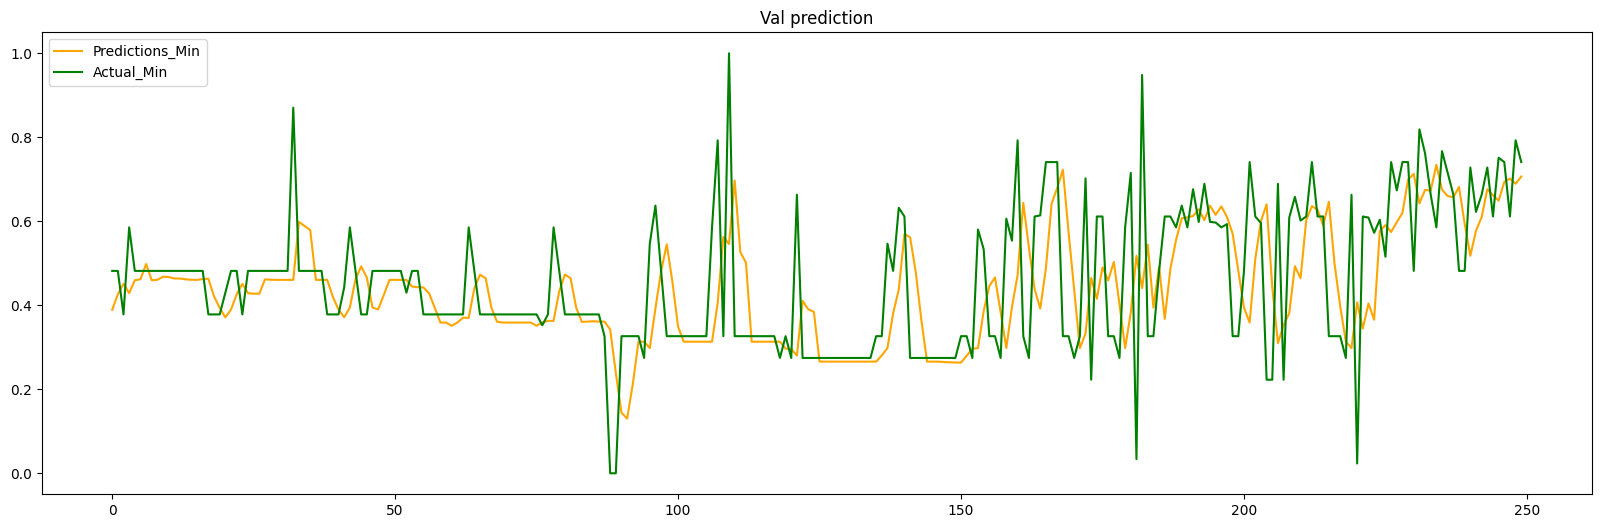

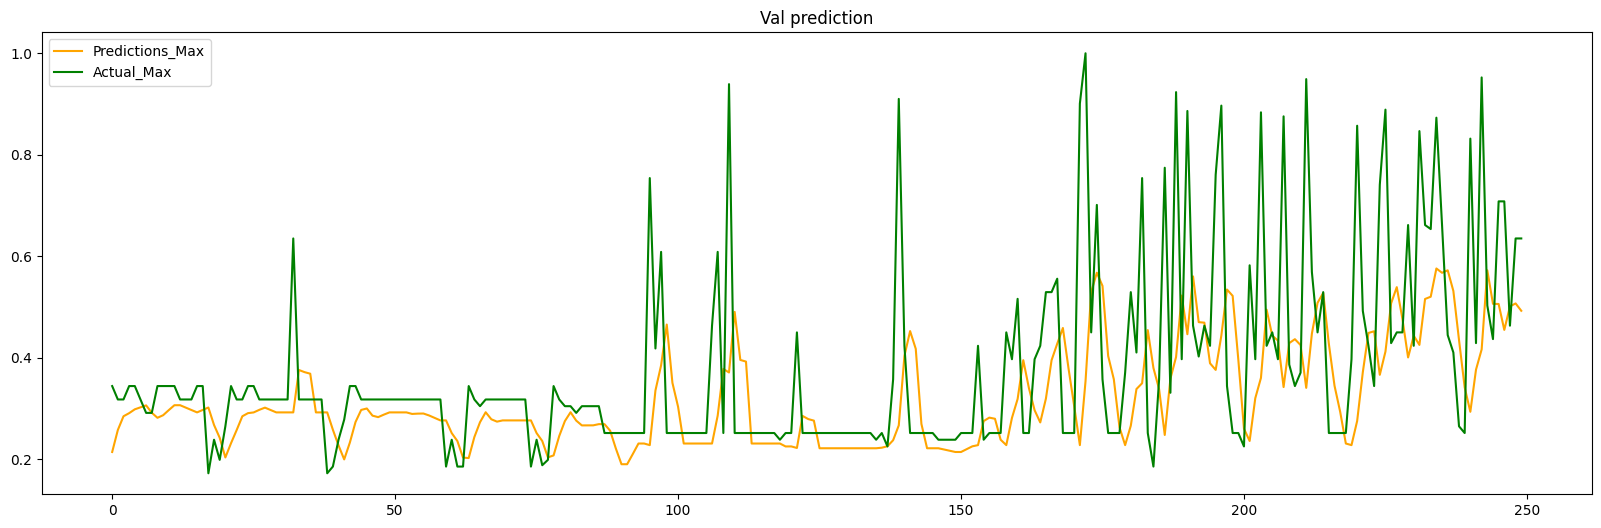

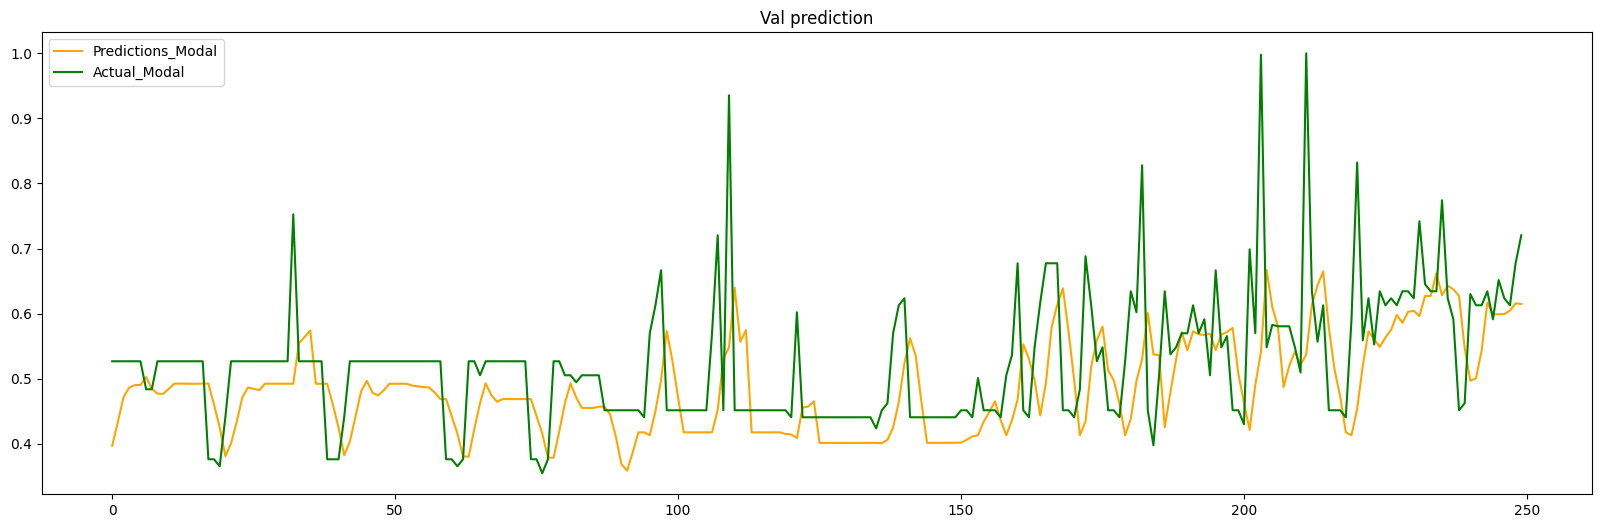

In [49]:
plot_predictions(model_coca, X_val, y_val, start=0, end=len(X_val), tag='Val prediction')

Mean absolute error for Test prediction is 0.08910944132818975
-------------------------------------------------------------------------------------
r2 for Test prediction is -8.393303996569834
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.705968    0.792746        0.477037    0.634921          0.626575   
1        0.762927    0.740933        0.522971    0.423280          0.661738   
2        0.733155    0.704663        0.475772    0.476190          0.641756   
3        0.728481    0.611399        0.441995    0.634921          0.620660   
4        0.682580    0.663212        0.430698    0.476190          0.594606   
5        0.648433    0.481865        0.437935    0.264550          0.586210   
6        0.560922    0.481865        0.383463    0.251323          0.540100   
7        0.515329    0.624352        0.305210    0.816667          0.502933   
8        

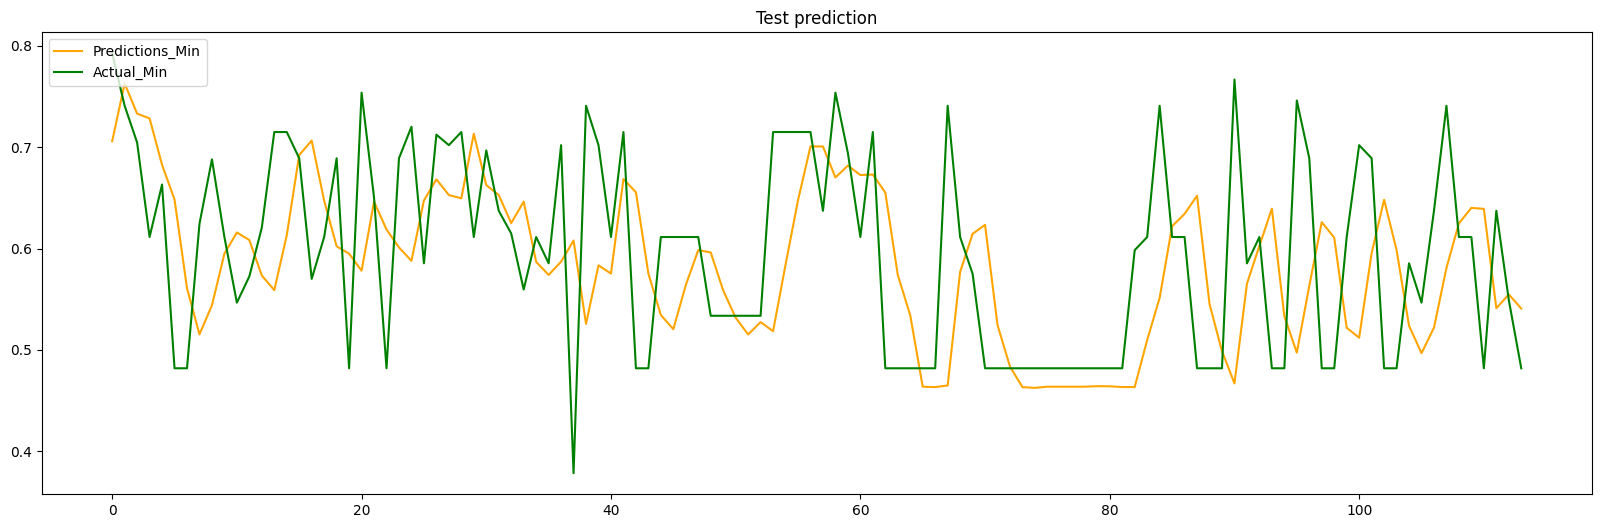

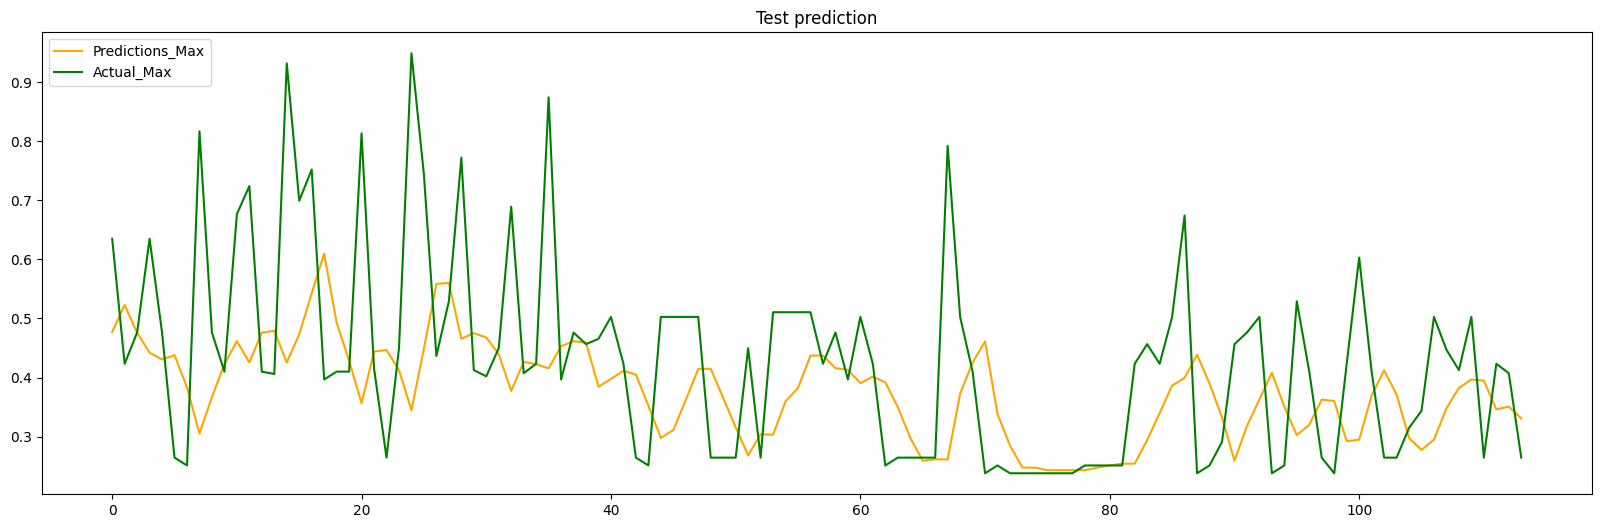

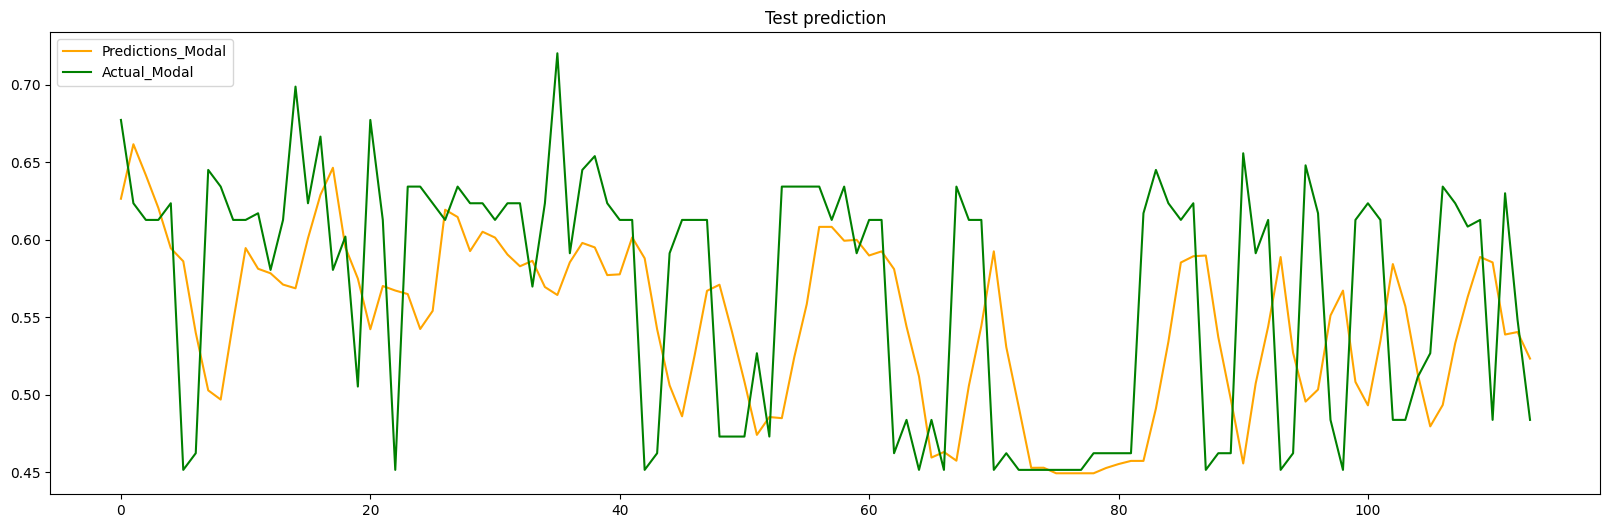

In [50]:
plot_predictions(model_coca, X_test, y_test, start=0, end=len(X_test), tag='Test prediction')

In [51]:
from tensorflow.keras.models import save_model

# Assuming 'model_coca' is your trained Keras model
model_coca.save('./models/Coca/model_coca(3,3) 83.138.keras')

In [53]:
from tensorflow.keras.models import load_model

model_bestmodel = load_model('./models/Coca/model_coca(3,3 82.989).keras')

In [54]:
import joblib

joblib.dump(scaler_coca,'./Scaler Objects/scaler_coca.pkl')

['./Scaler Objects/scaler_coca.pkl']

### Recursive prediction for next 31 days

In [60]:
recursive_prediction = []

last_batch = X_test[-3,:,:].copy()

for i in range(31):
    reshaped_data = last_batch.reshape(1,last_batch.shape[0],last_batch.shape[1]) 
    next_day_prediction = model_bestmodel.predict(reshaped_data,verbose=0)
    recursive_prediction.append(next_day_prediction)
    last_batch[-1] = next_day_prediction

In [151]:
for j in recursive_prediction:
    print(j)

[[0.5637171  0.37102202 0.59241855]]
[[0.56931347 0.3751363  0.6112214 ]]
[[0.57098603 0.37570438 0.6163401 ]]
[[0.57146204 0.3757683  0.6176917 ]]
[[0.5715936 0.3757714 0.6180425]]
[[0.5716292  0.37577012 0.6181328 ]]
[[0.5716388  0.3757695  0.61815596]]
[[0.57164127 0.37576932 0.6181617 ]]
[[0.57164204 0.37576926 0.6181633 ]]
[[0.5716421 0.3757692 0.6181637]]
[[0.5716421  0.37576923 0.6181637 ]]
[[0.57164216 0.37576923 0.6181638 ]]
[[0.57164216 0.37576926 0.6181638 ]]
[[0.5716421  0.37576923 0.6181638 ]]
[[0.57164216 0.37576926 0.6181639 ]]
[[0.57164216 0.3757692  0.6181639 ]]
[[0.5716422  0.3757693  0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.571

In [152]:
for k in recursive_prediction:
    k = scaler_coca.inverse_transform(k) 
    print(k)

[[23159.48  29024.633 29047.465]]
[[23375.5   29180.152 29921.795]]
[[23440.06  29201.625 30159.816]]
[[23458.434 29204.041 30222.666]]
[[23463.512 29204.158 30238.979]]
[[23464.889 29204.111 30243.178]]
[[23465.258 29204.086 30244.254]]
[[23465.354 29204.08  30244.52 ]]
[[23465.383 29204.076 30244.594]]
[[23465.385 29204.074 30244.613]]
[[23465.385 29204.076 30244.613]]
[[23465.387 29204.076 30244.62 ]]
[[23465.387 29204.076 30244.62 ]]
[[23465.385 29204.076 30244.62 ]]
[[23465.387 29204.076 30244.621]]
[[23465.387 29204.074 30244.621]]
[[23465.389 29204.08  30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29